In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

%matplotlib inline

### Data Source
https://www.kaggle.com/unsdsn/world-happiness

### Questions to Answer:
1. Overall, what are the different factors that lead to happiness? Does that change for different regions? Or through different years?
2. What similarities and differences do the countries experiencing the top 30 ranked countries vs the bottom 30 ranked countries WHS have?

### Data Preparation
1. There is a csv file for each year. Read the data for all years from 2015 to 2019;
2. Standardize the column names, and drop columns not used;
3. Add column 'Year' to each year's data;
4. The data for 2017/2018/2019 doesn't have Region column. Extract them from 2015/2016 to fill in;
5. Merge all 5 years data into one single DataFrame;
6. For some over analysis and comparison, only use countries with all 5 years data.

In [2]:
data_folder = '.\\TermProjData\\' 

factors = ['GDP','Family','Health','Freedom','Trust','Generosity']
common_cols = ['Rank', 'Score', 'Country', 'Region'] + factors

original_cols = {
    '2015':['Country','Region','Rank','Score','sd','GDP','Family','Health','Freedom','Trust','Generosity','residual'],
    '2016':['Country','Region','Rank','Score','conf_int_low','conf_int_high','GDP','Family','Health','Freedom','Trust','Generosity','residual'],
    '2017':['Country','Rank','Score','whisker_high','whisker_low','GDP','Family','Health','Freedom','Generosity','Trust','residual'],
    '2018':['Rank','Country','Score','GDP','Family','Health','Freedom','Generosity','Trust'],
    '2019':['Rank','Country','Score','GDP','Family','Health','Freedom','Generosity','Trust']
}

In [3]:
yearly_data = {}

for yr in original_cols:
    # read the original data, and add the Year column
    yr_data = pd.read_csv(f'{data_folder}{yr}.csv', skiprows=1, names=original_cols[yr])
    yr_data['Year'] = yr
    
    # drop any extra columns not exists in common_cols list
    extra_cols = [x for x in original_cols[yr] if x not in common_cols]
    if len(extra_cols) > 0:
        yr_data.drop(extra_cols, axis = 1, inplace = True)
    
    yearly_data[yr] = yr_data

In [4]:
# extract the region data from year 2015/2016
regions2015 = yearly_data['2015'][['Country', 'Region']]
regions2016 = yearly_data['2016'][['Country', 'Region']]
regions = pd.concat([regions2015, regions2016], ignore_index=False, sort=True)
regions.drop_duplicates(keep='first', inplace=True)
#regions

In [5]:
# add the region data to 2017, 2018 & 2019
for yr in ['2017', '2018', '2019']:
    yearly_data[yr] = pd.merge(yearly_data[yr], regions, how='left', on='Country')

In [6]:
# Concatenate everything into a single DataFrame
all_data = pd.concat(yearly_data.values(), ignore_index=False, sort=True)
#all_data.set_index(['country', 'year'], inplace=True)
#all_data[data.index.duplicated()]
all_data

,Country,Family,Freedom,GDP,Generosity,Health,Rank,Region,Score,Trust,Year
0,Switzerland,1.34951,0.66557,1.39651,0.29678,0.94143,1,Western Europe,7.587,0.41978,2015
1,Iceland,1.40223,0.62877,1.30232,0.43630,0.94784,2,Western Europe,7.561,0.14145,2015
2,Denmark,1.36058,0.64938,1.32548,0.34139,0.87464,3,Western Europe,7.527,0.48357,2015
3,Norway,1.33095,0.66973,1.45900,0.34699,0.88521,4,Western Europe,7.522,0.36503,2015
4,Canada,1.32261,0.63297,1.32629,0.45811,0.90563,5,North America,7.427,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,0.71100,0.55500,0.35900,0.21700,0.61400,152,Sub-Saharan Africa,3.334,0.41100,2019
152,Tanzania,0.88500,0.41700,0.47600,0.27600,0.49900,153,Sub-Saharan Africa,3.231,0.14700,2019
153,Afghanistan,0.51700,0.00000,0.35000,0.15800,0.36100,154,Southern Asia,3.203,0.02500,2019
154,Central African Republic,0.00000,0.22500,0.02600,0.23500,0.10500,155,Sub-Saharan Africa,3.083,0.03500,2019


In [7]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 782 entries, 0 to 155
Data columns (total 11 columns):
Country       782 non-null object
Family        782 non-null float64
Freedom       782 non-null float64
GDP           782 non-null float64
Generosity    782 non-null float64
Health        782 non-null float64
Rank          782 non-null int64
Region        774 non-null object
Score         782 non-null float64
Trust         781 non-null float64
Year          782 non-null object
dtypes: float64(7), int64(1), object(3)
memory usage: 73.3+ KB


In [8]:
#data[data['Region'].isna()]

In [9]:
country_years = all_data.groupby('Country').size()

# the countries (141 in total) have all 5 years data
valid_countries = country_years.index[country_years == 5]
valid_countries.shape

(141,)

In [10]:
data = all_data[all_data['Country'].isin(valid_countries)]
data

,Country,Family,Freedom,GDP,Generosity,Health,Rank,Region,Score,Trust,Year
0,Switzerland,1.34951,0.66557,1.39651,0.29678,0.94143,1,Western Europe,7.587,0.41978,2015
1,Iceland,1.40223,0.62877,1.30232,0.43630,0.94784,2,Western Europe,7.561,0.14145,2015
2,Denmark,1.36058,0.64938,1.32548,0.34139,0.87464,3,Western Europe,7.527,0.48357,2015
3,Norway,1.33095,0.66973,1.45900,0.34699,0.88521,4,Western Europe,7.522,0.36503,2015
4,Canada,1.32261,0.63297,1.32629,0.45811,0.90563,5,North America,7.427,0.32957,2015
...,...,...,...,...,...,...,...,...,...,...,...
149,Malawi,0.56000,0.44300,0.19100,0.21800,0.49500,150,Sub-Saharan Africa,3.410,0.08900,2019
150,Yemen,1.16300,0.14300,0.28700,0.10800,0.46300,151,Middle East and Northern Africa,3.380,0.07700,2019
151,Rwanda,0.71100,0.55500,0.35900,0.21700,0.61400,152,Sub-Saharan Africa,3.334,0.41100,2019
152,Tanzania,0.88500,0.41700,0.47600,0.27600,0.49900,153,Sub-Saharan Africa,3.231,0.14700,2019


### Overall Analysis

**Country Numbers per Region**

In [11]:
number_countries_regions = data.groupby('Region')['Country'].nunique().sort_values(ascending= False) 
number_countries_regions

Region
Sub-Saharan Africa                 31
Central and Eastern Europe         28
Western Europe                     20
Latin America and Caribbean        20
Middle East and Northern Africa    19
Southeastern Asia                   8
Southern Asia                       7
Eastern Asia                        4
North America                       2
Australia and New Zealand           2
Name: Country, dtype: int64

**Most Improved 10 Countries**

In [12]:
rank_country_year = data.pivot_table('Rank', index='Country', columns='Year')
rank_country_year.sort_values(by='2019', inplace=True, ascending=True)
rank_country_year['2015v2019'] = rank_country_year['2015'] - rank_country_year['2019']

# keep only valid countries
#rank_country_year = rank_country_year.loc[valid_countries] 
rank_most_increased = rank_country_year.sort_values(by='2015v2019', ascending=False)
rank_most_increased.head(10)

Year,2015,2016,2017,2018,2019,2015v2019
Country,,,,,,
Benin,155,153,143,136,102,53
Ivory Coast,151,139,128,107,99,52
Honduras,105,104,91,72,59,46
Hungary,104,91,75,69,62,42
Gabon,143,134,118,103,104,39
Romania,86,71,57,52,48,38
Cameroon,133,114,107,99,96,37
Bulgaria,134,129,105,100,97,37
Burkina Faso,152,145,134,121,115,37


**Most Decreased 10 Countries**

In [13]:
rank_most_increased.tail(10)

Year,2015,2016,2017,2018,2019,2015v2019
Country,,,,,,
Botswana,128,137,142,146,148,-20
Algeria,68,38,53,84,88,-20
Ukraine,111,123,132,138,133,-22
Belarus,59,61,67,73,81,-22
India,117,118,122,133,140,-23
Liberia,116,150,148,149,141,-25
Haiti,119,136,145,148,147,-28
Zimbabwe,115,131,138,144,146,-31
Zambia,85,106,116,125,138,-53


**Correlations between Happiness Score and All Six Factors**

Overall, for all countries through all 5 years, the happiness score is quite strongly correlated with GDP, Health and Family.

In [14]:
corr_overall = data.corrwith(data['Score']).sort_values(ascending=False)
corr_overall

Score         1.000000
GDP           0.796553
Health        0.746618
Family        0.652672
Freedom       0.547451
Trust         0.433258
Generosity    0.135260
Rank         -0.992477
dtype: float64

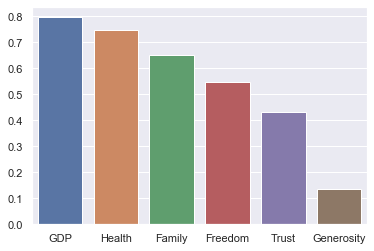

In [15]:
corr_overall_subfactors = corr_overall[factors].sort_values(ascending=False)
sns.barplot(x = corr_overall_subfactors.index, y = corr_overall_subfactors.values)

**Correlations between Happiness Score and All Six Factors by Region**

In [16]:
corr_by_region = data.groupby('Region').corrwith(data['Score'])[factors]
corr_by_region

,GDP,Family,Health,Freedom,Trust,Generosity
Region,,,,,,
Australia and New Zealand,-0.220932,-0.058005,-0.362629,0.157874,0.631711,0.218114
Central and Eastern Europe,0.445069,0.511369,0.156453,0.450494,-0.025627,-0.028858
Eastern Asia,0.910060,-0.104280,0.892224,-0.215113,0.664331,-0.374646
Latin America and Caribbean,0.684055,0.383000,0.630620,0.622908,0.126939,-0.391357
Middle East and Northern Africa,0.816217,0.595725,0.635705,0.716933,0.473856,0.123699
North America,-0.331981,-0.120791,0.322215,0.783695,0.923106,0.550491
Southeastern Asia,0.863695,0.503412,0.681850,-0.220997,0.348378,-0.228417
Southern Asia,0.360002,0.366013,0.350698,0.271903,0.555491,0.244368
Sub-Saharan Africa,0.506432,0.412116,0.160486,0.159677,-0.348110,0.020418


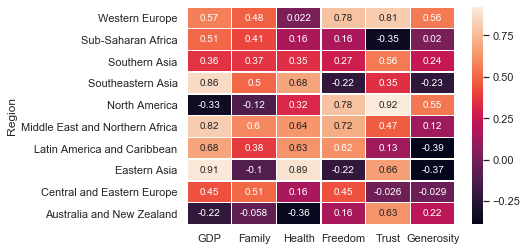

In [17]:
#f, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(corr_by_region[factors], annot=True, linewidths = 0.5) #, ax=ax)
plt.ylim([0,10])
None

**Correlations between Happiness Score and All Six Factors by Year**

In [18]:
corr_by_year = data.groupby('Year').corrwith(data['Score'])[factors]
corr_by_year

,GDP,Family,Health,Freedom,Trust,Generosity
Year,,,,,,
2015,0.782369,0.740415,0.749221,0.568264,0.444138,0.175116
2016,0.812090,0.747714,0.783683,0.562283,0.465489,0.181759
2017,0.821095,0.759098,0.774867,0.567290,0.461338,0.153764
2018,0.802748,0.748927,0.773896,0.543048,0.445790,0.153930
2019,0.797962,0.769811,0.783737,0.567108,0.434989,0.085999


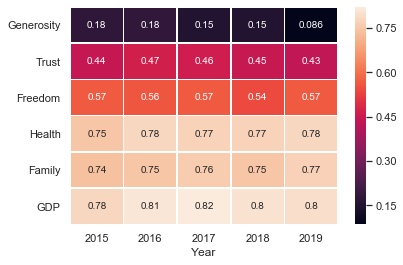

In [19]:
sns.heatmap(corr_by_year[factors].T, annot=True, linewidths = 0.5) #, ax=ax)
plt.ylim([0,6])
None

**Correlations between Happiness Score and All Six Factors by Region & Year**

In [20]:
corr_by_region_year = data.groupby(['Region', 'Year']).corrwith(data['Score'])[factors]
corr_by_region_year

GDP    Family    Health   Freedom  \
Region                          Year                                           
Australia and New Zealand       2015 -0.531198  0.531198 -0.531198 -0.531198   
                                2016 -0.686912  0.686912 -0.686912  0.686912   
                                2017 -0.827782  0.827782 -0.827782  0.827782   
                                2018 -0.827782  0.827782 -0.827782  0.827782   
                                2019 -0.863884  0.863884 -0.863884  0.863884   
Central and Eastern Europe      2015  0.345905  0.557241  0.042292  0.406093   
                                2016  0.436871  0.625174  0.015178  0.412683   
                                2017  0.503756  0.612259  0.057670  0.476074   
                                2018  0.507833  0.661098  0.317773  0.536916   
                                2019  0.477123  0.574449  0.353538  0.445093   
Eastern Asia                    2015  0.990913 -0.236570  0.955134 -0.300123   
                                2016  0.967971 -0.208616  0.984830 -0.029315   
                                2017  0.970444 -0.318380  0.985261 -0.101113   
                                2018  0.991451  0.032504  0.902831 -0.308566   
                                2019  0.955539 -0.156650  0.832382 -0.482990   
Latin America and Caribbean     2015  0.766567  0.484502  0.666572  0.405852   
                                2016  0.799955  0.609028  0.765863  0.536111   
                                2017  0.734493  0.625491  0.808118  0.691137   
                                2018  0.675220  0.585259  0.819988  0.744531   
                                2019  0.594051  0.583830  0.760693  0.742671   
Middle East and Northern Africa 2015  0.801444  0.849104  0.606093  0.700706   
                                2016  0.792951  0.815087  0.676326  0.768683   
                                2017  0.810823  0.792740  0.776491  0.779695   
                                2018  0.843445  0.560683  0.721527  0.638878   
                                2019  0.850265  0.712393  0.812184  0.786863   
North America                   2015 -0.975892  0.975892  0.975892  0.975892   
                                2016 -0.949678  0.949678  0.949678  0.949678   
                                2017 -0.926256  0.926256  0.926256  0.926256   
                                2018 -0.993262  0.993262  0.993262  0.993262   
                                2019 -0.967392  0.967392  0.967392  0.967392   
Southeastern Asia               2015  0.878302  0.862340  0.778610 -0.185702   
                                2016  0.912039  0.829949  0.789849 -0.292894   
                                2017  0.901374  0.904287  0.795712 -0.279622   
                                2018  0.863682  0.767966  0.788220 -0.324818   
                                2019  0.798135  0.837645  0.827624  0.061122   
Southern Asia                   2015  0.459473  0.313435  0.473712  0.076512   
                                2016  0.464996  0.493666  0.655548  0.343582   
                                2017  0.130475  0.207844  0.284968  0.046302   
                                2018  0.363566  0.525212  0.417761  0.435592   
                                2019  0.296770  0.545605  0.240442  0.400693   
Sub-Saharan Africa              2015  0.373066  0.386041  0.143401  0.135386   
                                2016  0.516448  0.350547  0.188055  0.210935   
                                2017  0.583560  0.528296  0.085170  0.248541   
                                2018  0.580380  0.462829  0.154725  0.188129   
                                2019  0.517320  0.370576  0.015424  0.037571   
Western Europe                  2015  0.691577  0.799738  0.039825  0.814572   
                                2016  0.665815  0.782301  0.005229  0.829608   
                                2017  0.697019  0.759475 -0.173871  0.834830   
                                2018  0.654

### Segment Comparison

In [21]:
def get_target_corr_df(country_list=None, sort_col='Rank', take_top=True):
    corr_yearly = {'Year': [],
                    'Top1_Factor': [],
                    'Top1_Corr': [],
                    'Top2_Factor': [],
                    'Top2_Corr': [],
                    'Top3_Factor': [],
                    'Top3_Corr': []}

    for yr in yearly_data:
        if country_list is None:
            target_data = yearly_data[yr].sort_values(by=sort_col, ascending=take_top)[:30]
        else:
            target_data = yearly_data[yr][yearly_data[yr]['Country'].isin(country_list)]
            
        corrs = target_data.corrwith(target_data['Score']).sort_values(ascending=False)
        
        corr_yearly['Year'].append(yr)
        corr_yearly['Top1_Factor'].append(corrs.index[1])
        corr_yearly['Top1_Corr'].append(corrs[1])
        corr_yearly['Top2_Factor'].append(corrs.index[2])
        corr_yearly['Top2_Corr'].append(corrs[2])
        corr_yearly['Top3_Factor'].append(corrs.index[3])
        corr_yearly['Top3_Corr'].append(corrs[3])
    
    corr_df = pd.DataFrame(corr_yearly)
    corr_df.set_index('Year', inplace=True)
    
    return corr_df

**Top 30 Ranking Countries: Correlations between Happiness Score and Top 3 Factors by Year**

In [22]:
corr_by_year_top30_rankings = get_target_corr_df(sort_col='Rank', take_top=True)
corr_by_year_top30_rankings

,Top1_Factor,Top1_Corr,Top2_Factor,Top2_Corr,Top3_Factor,Top3_Corr
Year,,,,,,
2015,Family,0.487192,Freedom,0.475196,Generosity,0.445170
2016,Family,0.559597,Freedom,0.481748,Trust,0.430538
2017,Family,0.669581,Freedom,0.539537,Trust,0.521669
2018,Trust,0.768417,Generosity,0.632964,Freedom,0.629490
2019,Family,0.756163,Trust,0.733205,Freedom,0.667367


**Bottom 30 Ranking Countries: Correlations between Happiness Score and Top 3 Factors by Year**

In [23]:
corr_by_year_bottom30_rankings = get_target_corr_df(sort_col='Rank', take_top=False)
corr_by_year_bottom30_rankings

,Top1_Factor,Top1_Corr,Top2_Factor,Top2_Corr,Top3_Factor,Top3_Corr
Year,,,,,,
2015,Family,0.486632,GDP,0.382875,Health,0.240706
2016,Family,0.629855,GDP,0.328776,Freedom,0.096974
2017,Family,0.670229,GDP,0.347950,Freedom,0.182009
2018,Family,0.363270,GDP,0.329726,Health,0.317443
2019,Family,0.587428,Freedom,0.293855,GDP,0.242069


**Most Improved 30 Countries: Correlations between Happiness Score and Top 3 Factors by Year**

In [24]:
corr_by_year_most_increased30 = get_target_corr_df(country_list=rank_most_increased[:30].index)
corr_by_year_most_increased30

,Top1_Factor,Top1_Corr,Top2_Factor,Top2_Corr,Top3_Factor,Top3_Corr
Year,,,,,,
2015,Health,0.820707,GDP,0.759172,Family,0.732186
2016,Health,0.813392,GDP,0.780452,Family,0.742940
2017,Health,0.821528,GDP,0.809704,Family,0.783767
2018,GDP,0.828764,Health,0.805193,Family,0.767901
2019,Health,0.784267,GDP,0.774332,Family,0.693488


**Most Decreased 30 Countries: Correlations between Happiness Score and Top 3 Factors by Year**

In [25]:
corr_by_year_most_decreased30 = get_target_corr_df(country_list=rank_most_increased[-30:].index)
corr_by_year_most_decreased30

,Top1_Factor,Top1_Corr,Top2_Factor,Top2_Corr,Top3_Factor,Top3_Corr
Year,,,,,,
2015,Family,0.708885,GDP,0.656049,Health,0.651206
2016,GDP,0.714203,Health,0.695839,Family,0.693558
2017,Health,0.732945,GDP,0.726874,Family,0.689915
2018,Health,0.757315,GDP,0.748027,Family,0.703798
2019,Health,0.789680,GDP,0.739728,Family,0.711528


**Avg Score by Region & Year**

In [26]:
avg_score_region_year = pd.crosstab(data['Region'], data['Year'], values=data['Score'], aggfunc='mean', margins=True)
avg_score_region_year.sort_values(by='All', ascending=False, inplace=True)
avg_score_region_year

Year,2015,2016,2017,2018,2019,All
Region,,,,,,
Australia and New Zealand,7.285000,7.323500,7.299000,7.298000,7.267500,7.294600
North America,7.273000,7.254000,7.154500,7.107000,7.085000,7.174700
Western Europe,6.739350,6.731400,6.748400,6.829100,6.898400,6.789330
Latin America and Caribbean,6.137300,6.050500,5.947400,5.937750,5.942550,6.003100
Eastern Asia,5.496250,5.477000,5.496500,5.540250,5.564250,5.514850
Central and Eastern Europe,5.344571,5.379607,5.418321,5.473929,5.571786,5.437643
All,5.406716,5.397887,5.408291,5.440156,5.485383,5.427687
Southeastern Asia,5.372625,5.396750,5.444875,5.399750,5.333375,5.389475
Middle East and Northern Africa,5.330789,5.386053,5.369684,5.282737,5.237000,5.321253


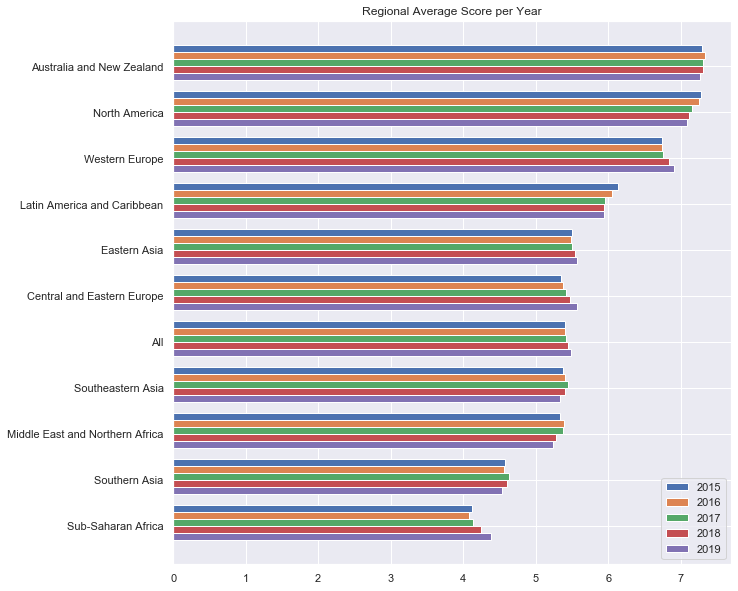

In [27]:
#plot avg score for each region/year
ind = np.arange(avg_score_region_year.shape[0])
width = 0.15                # width of the bar
fig, ax = plt.subplots(figsize=(10, 10))

years = list(yearly_data.keys())
bars = []
for x in range(len(years)):
    yr_bar = ax.barh(ind+width*x, avg_score_region_year[years[x]], width, align='center')
    bars.append(yr_bar)

# add some text for labels, title and axes ticks
ax.set(title = 'Regional Average Score per Year', yticks = ind + (width * 5)/2, yticklabels = avg_score_region_year.index)
ax.invert_yaxis()
ax.legend(bars, years)

plt.show()

### More Plots

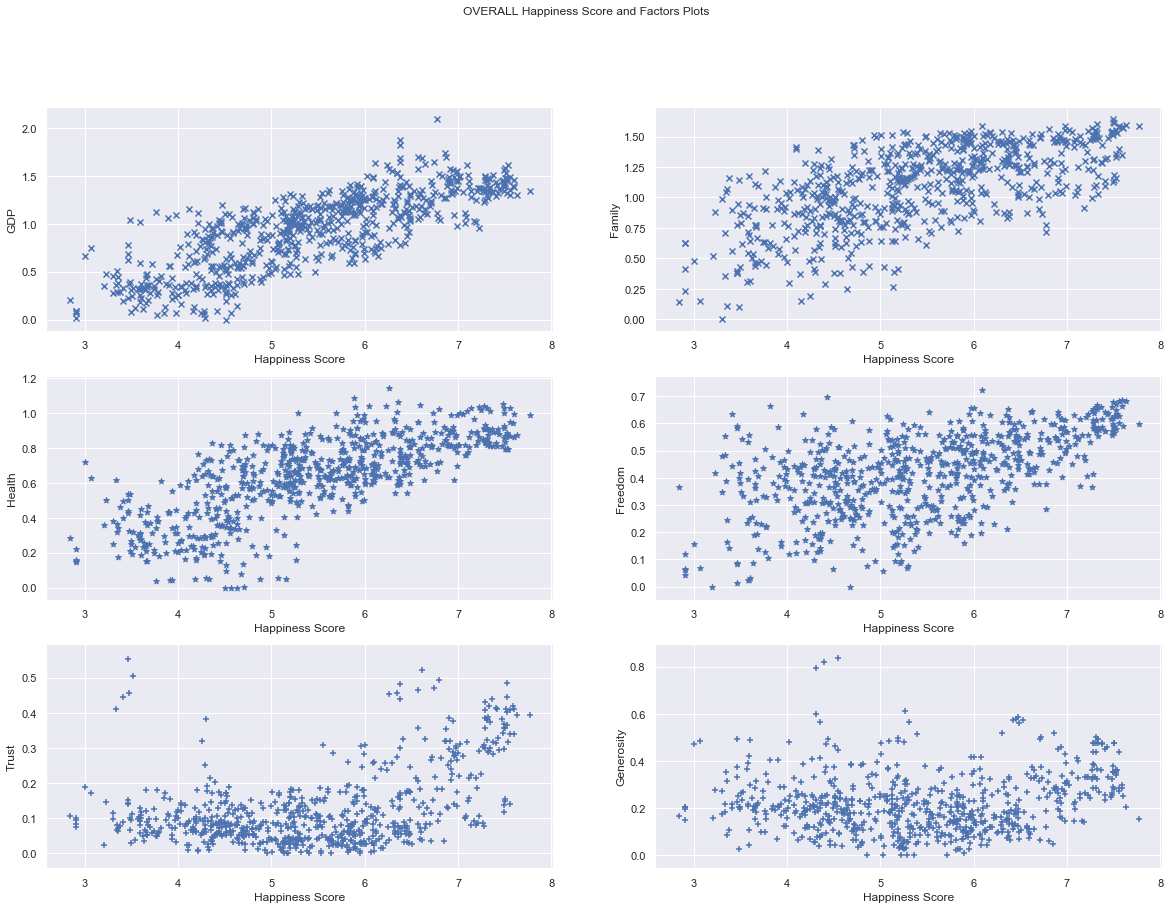

In [28]:
fig, axs = plt.subplots(3, 2, figsize=(20,14))
fig.suptitle('OVERALL Happiness Score and Factors Plots')

markers = ['x', 'x', '*', '*', '+', '+']
for idx in range(len(factors)):
    score = data.Score
    factor = data[factors[idx]]
    
    r, c = idx//2, idx%2
    axs[r, c].scatter(score, factor, marker=markers[idx])
    axs[r, c].set_xlabel('Happiness Score')
    axs[r, c].set_ylabel(factors[idx])
    #axs[r, c].set_title(factors[idx])

plt.show()

In [29]:
def plot_bars(ax, bar1_data, bar2_data, title):
    width = 0.35                # width of the bar
    ind = np.arange(len(factors))
    
    bar1_corrs = bar1_data.corrwith(bar1_data['Score'])[factors]
    bar2_corrs = bar2_data.corrwith(bar2_data['Score'])[factors]

    bar1 = ax.bar(ind, bar1_corrs, width, align='center')
    bar2 = ax.bar(ind+width, bar2_corrs, width, align='center')
    bars = [bar1, bar2]

    # add some text for labels, title and axes ticks
    ax.set(title = f'{title}', xticks = ind + width/2, xticklabels = factors)
    ax.legend(bars, ['TOP 30', 'BOTTOM 30'])

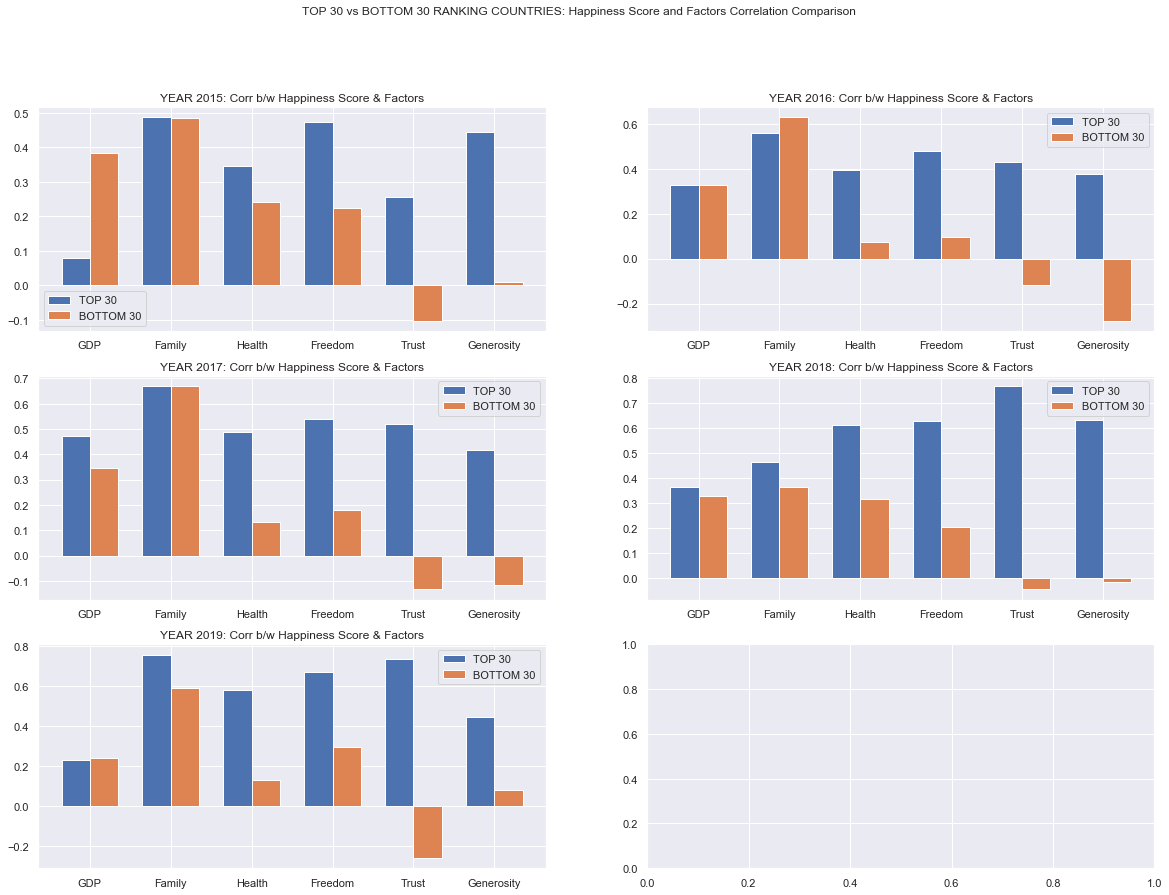

In [30]:
fig, axs = plt.subplots(3, 2, figsize=(20,14))
fig.suptitle('TOP 30 vs BOTTOM 30 RANKING COUNTRIES: Happiness Score and Factors Correlation Comparison')
for idx in range(len(yearly_data)):
    yr = str(2015 + idx)
    yr_data = yearly_data[yr].sort_values(by='Rank', ascending=True)

    top30_data = yr_data[:30]
    bottom30_data = yr_data[-30:]
    plot_bars(axs[idx//2, idx%2], top30_data, bottom30_data, f'YEAR {yr}: Corr b/w Happiness Score & Factors')

plt.show()

**REFERENCES**

https://en.wikipedia.org/wiki/World_Happiness_Report

https://worldhappiness.report/faq/